## Introduction
In this exercise you'll train a neural network on the Fuel Economy dataset and then explore the effect of the learning rate and batch size on SGD.

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
# Uncomment to see original data
fuel.head()
# Uncomment to see processed features
pd.DataFrame(X[:10,:]).head()


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# shape
fuel.shape

(1107, 14)

Run the next cell to define the network we'll use for this task.

In [38]:
import tensorrt
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape = input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

## 1) Add Loss and Optimizer
Before training the network we need to define the loss and optimizer we'll use. Using the model's compile method, add the Adam optimizer and MAE loss.

In [39]:
# YOUR CODE HERE
model.compile(
    optimizer = 'adam',
    loss = 'mae',
)

## 2) Train Model
Once you've defined the model and compiled it with a loss and optimizer you're ready for training. Train the network for 200 epochs with a batch size of 128. The input data is X with target y.

In [40]:
history = model.fit(
    X,y,
    batch_size= 128,
    epochs= 200,
)

Epoch 1/200
9/9 [==============================] - 0s 2ms/step - loss: 2.8725
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 1.0810
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6837
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3899
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2702
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2057
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1682
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1389
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1165
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0994
Epoch 11/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0868
Epoch 12/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0809
Epoch 13/200
9/9 [==============================] - 0s 2ms/st

In [41]:
# YOUR CODE HERE

history1 = model.fit(
    X, y,
    batch_size=800,
    epochs=30,
)
history2 = model.fit(
    X, y,
    batch_size=800,
    epochs=50,
)

history3 = model.fit(
    X, y,
    batch_size=400,
    epochs=30,
)
history4 = model.fit(
    X, y,
    batch_size=600,
    epochs=30,
)



Epoch 1/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0300
Epoch 2/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0289
Epoch 3/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0280
Epoch 4/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0270
Epoch 5/30
2/2 [==============================] - 0s 5ms/step - loss: 0.0251
Epoch 6/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0240
Epoch 7/30
2/2 [==============================] - 0s 5ms/step - loss: 0.0233
Epoch 8/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0259
Epoch 9/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0226
Epoch 10/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0243
Epoch 11/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0221
Epoch 12/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0201
Epoch 13/30
2/2 [==============================] - 0s 5ms/step - loss: 0.

The last step is to look at the loss curves and evaluate the training. Run the cell below to get a plot of the training loss.

<Axes: >

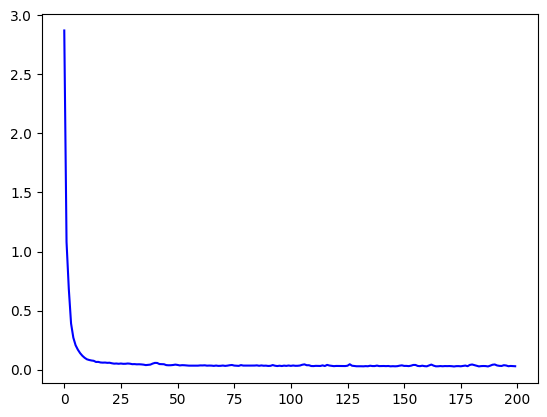

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
history_df['loss'].plot(color = 'blue')

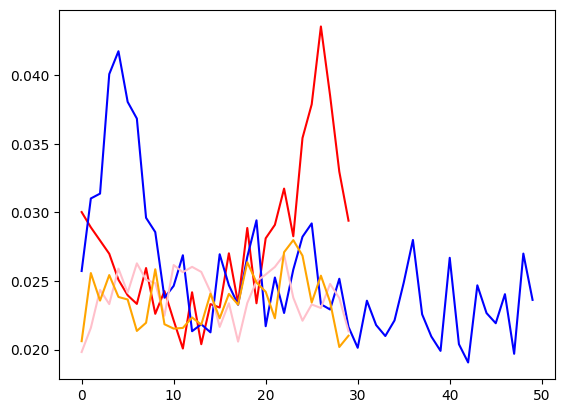

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# convert the training history to a dataframe
history1_df = pd.DataFrame(history1.history)
# use Pandas native plot method
history1_df['loss'].plot(color = 'red');

# convert the training history to a dataframe
history2_df = pd.DataFrame(history2.history)
# use Pandas native plot method
history2_df['loss'].plot(color = 'blue')

# convert the training history to a dataframe
history3_df = pd.DataFrame(history3.history)
# use Pandas native plot method
history3_df['loss'].plot(color = 'pink');

# convert the training history to a dataframe
history4_df = pd.DataFrame(history4.history)
# use Pandas native plot method
history4_df['loss'].plot(color = 'orange');



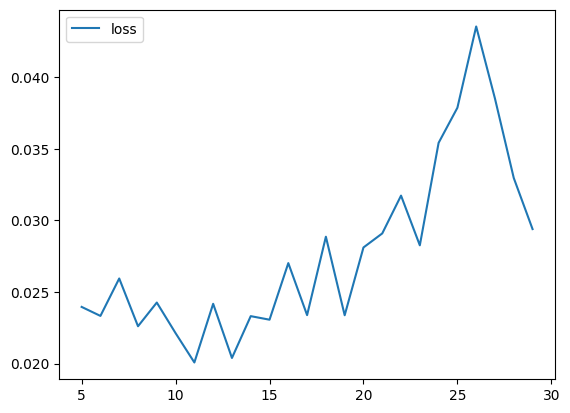

In [44]:
import pandas as pd

history1_df = pd.DataFrame(history1.history)
# Start the plot at epoch 5. You can change this to get a different view.
history1_df.loc[5:, ['loss']].plot();

## 3) Evaluate Training
If you trained the model longer, would you expect the loss to decrease further?

With the learning rate and the batch size, you have some control over:

> How long it takes to train a model
> How noisy the learning curves are
> How small the loss becomes

To get a better understanding of these two parameters, we'll look at the linear model, our ppsimplest neural network. Having only a single weight and a bias, it's easier to see what effect a change of parameter has.

The next cell will generate an animation like the one in the tutorial. Change the values for learning_rate, batch_size, and num_examples (how many data points) and then run the cell. (It may take a moment or two.) Try the following combinations, or try some of your own:


| `learning_rate` | `batch_size` | `num_examples` |
|-----------------|--------------|----------------|
| 0.05            | 32           | 256            |
| 0.05            | 2            | 256            |
| 0.05            | 128          | 256            |
| 0.02            | 32           | 256            |
| 0.2             | 32           | 256            |
| 1.0             | 32           | 256            |
| 0.9             | 4096         | 8192           |
| 0.99            | 4096         | 8192           |

In [45]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import tensorrt

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('seaborn-v0_8-whitegrid')

# NUM_EXAMPLES = 256
# BATCH_SIZE = 8
# STEPS = 50
# LR = 0.1

def animate_sgd(num_examples, batch_size, steps, learning_rate,
                true_w=3.0, true_b=2.0, seed=0):
    # Define model
    class Model(object):
        def __init__(self, w_init=-1.0, b_init=-1.0):
            self.W = tf.Variable(w_init)
            self.b = tf.Variable(b_init)

        def __call__(self, x):
            return self.W * x + self.b
            
    def loss(target_y, predicted_y):
        return tf.reduce_mean(tf.square(target_y - predicted_y))

    def train(model, inputs, outputs, learning_rate):
        with tf.GradientTape() as t:
            current_loss = loss(outputs, model(inputs))
            dW, db = t.gradient(current_loss, [model.W, model.b])
            model.W.assign_sub(learning_rate * dW)
            model.b.assign_sub(learning_rate * db)
    # Data
    inputs  = tf.random.normal(shape=[num_examples], seed=seed)
    noise   = tf.random.normal(shape=[num_examples], seed=seed+1)
    outputs = inputs * true_w + true_b + noise
    ds = (tf.data.Dataset
          .from_tensor_slices((inputs, outputs))
          .shuffle(1000, seed=seed)
          .batch(batch_size)
          .repeat())
    ds = iter(ds)
    model = Model()
    # Collect the history of W-values and b-values to plot later
    Ws, bs, xs, ys, ls = [], [], [], [], []
    # Construct plot
    fig = plt.figure(dpi=100, figsize=(8, 3))

    # Regression Line
    ax1 = fig.add_subplot(131)
    ax1.set_title("Fitted Line")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_xlim(-3, 2.5)
    ax1.set_ylim(-8, 11)
    p10, = ax1.plot(inputs, outputs, 'r.', alpha=0.1) # full dataset
    p11, = ax1.plot([], [], 'C3.') # batch, color Red
    p12, = ax1.plot([], [], 'k') # fitted line, color Black

    # Loss
    ax2 = fig.add_subplot(132)
    ax2.set_title("Training Loss")
    ax2.set_xlabel("Batches Seen")
    ax2.set_xlim(0, steps)
    ax2.set_ylim(0, 40)
    p20, = ax2.plot([], [], 'C0') # color Blue

    # Weights
    ax3 = fig.add_subplot(133)
    ax3.set_title("Weights")
    ax3.set_xlabel("Batches Seen")
    ax3.set_xlim(0, steps)     # 
    ax3.set_ylim(-2, 4)
    ax3.plot(range(steps), [true_w for _ in range(steps)], 'C5--')
    ax3.plot(range(steps), [true_b for _ in range(steps)], 'C8--')
    p30, = ax3.plot([], [], 'C5') # W color Brown
    p30.set_label('W')
    p31, = ax3.plot([], [], 'C8') # b color Green
    p31.set_label('b')
    ax3.legend()

    fig.tight_layout()

    def init():
        return [p10]

    def update(epoch):
        x, y = next(ds)
        y_pred = model(x)
        current_loss = loss(y, y_pred)
          
        Ws.append(model.W.numpy())
        bs.append(model.b.numpy())
        xs.append(x.numpy())
        ys.append(y_pred.numpy())
        ls.append(current_loss.numpy())
        p11.set_data(x.numpy(), y.numpy())
        inputs = tf.linspace(-3.0, 2.5, 30)
        p12.set_data(inputs, Ws[-1]*inputs + bs[-1])
        p20.set_data(range(epoch), ls)
        p30.set_data(range(epoch), Ws)
        p31.set_data(range(epoch), bs)

        train(model, x, y, learning_rate=learning_rate)
        #   print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        #         (epoch, Ws[-1], bs[-1], current_loss))
        
        return p11, p12, p20

    ani = animation.FuncAnimation(
        fig,
        update,
        frames=range(1, steps),
        init_func=init,
        blit=True,
        interval=100,
    )
    plt.close()
    return ani
    
# Convert mp4 to gif:
# ffmpeg -i temp.mp4 -filter_complex "[0:v] fps=12,scale=480:-1,split [a][b];[a] palettegen [p];[b][p] paletteuse" temp.gif

In [48]:

# YOUR CODE HERE: Experiment with different values for the learning rate, batch size, and number of examples
learning_rate = 0.05
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

## 4) Learning Rate and Batch Size
What effect did changing these parameters have? After you've thought about it, run the cell below for some discussion.


You probably saw that smaller batch sizes gave noisier weight updates and loss curves. This is because each batch is a small sample of data and smaller samples tend to give noisier estimates. Smaller batches can have an "averaging" effect though which can be beneficial.

Smaller learning rates make the updates smaller and the training takes longer to converge. Large learning rates can speed up training, but don't "settle in" to a minimum as well. When the learning rate is too large, the training can fail completely. (Try setting the learning rate to a large value like 0.99 to see this.)